# 华侨城房屋出租与中介出租的收益问题

## 一、背景

两个月前，有中介打电话，询问是否要出租给中介，让中介做二房东，然后给业主的收益为 ¥15,000 每月，为期 6 年。因为原先是打算自用，但考虑到出国留学后，2人住170多平方米有些偏大，故，有放租的想法。

## 二、数据收集
第一，先计算如果让中介去打理，则能大约收获：¥18,000 一年，6年总共为 ¥1,080,000。其二，我们也可以自己打理，查询了中原地产的数据，发现华侨城天鹅堡二期 150-200 平方米的房子样本量为 4 ，分别为 ¥18,000，¥20,000，¥28,000，¥26,000 大约均价在 ¥23,000每月 左右；而查询了链家有9个数据，分别为：¥28,000，¥30,000，¥20,000，¥39,000，¥32,000，¥28,000，¥25,000，¥20,000，¥26,000。得出均价为：¥27,555；两者共计 13 个数据，总均价为 ¥26,153。这样我们 6 年大概为：¥1,883,016.

In [79]:
SUM1 = sum([18000,20000,28000,26000])
avr1 = SUM1 / 4
print(int(avr1),"yuan","中原网数据")

SUM2 = sum([28000,30000,20000,39000,32000,28000,25000,20000,26000])
avr2 = SUM2 / 9
print(int(avr2),"yuan","链家数据")

SUM3 = sum([18000,20000,28000,26000,28000,30000,20000,39000,32000,
            28000,25000,20000,26000])
avr3 = SUM3 / 13
print(int(avr3),"综合数据")

23000 yuan 中原网数据
27555 yuan 链家数据
26153 综合数据


In [80]:
def bubble_sort(arry):
    n = len(arry)                   #获得数组的长度
    for i in range(n):
        for j in range(1,n-i):
            if  arry[j-1] > arry[j] :       #如果前者比后者大
                arry[j-1],arry[j] = arry[j],arry[j-1]      #则交换两者
    return arry

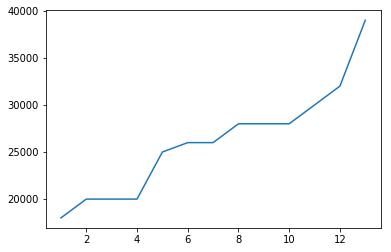

In [81]:
import numpy as np
import matplotlib.pyplot as plt 

x = bubble_sort([18000,20000,28000,26000,28000,30000,20000,39000,32000,
            28000,25000,20000,26000])
y = (1,2,3,4,5,6,7,8,9,10,11,12,13)

plt.plot(y,x)

## 模型

### 问题分析

现在来分析「我们自己打理」这一种情况：<br>
假设通货膨胀为零，由于通货膨胀难以量化，而且也有可能存在通货紧缩，故忽略；
<br>
设中介费为$\lambda$倍的一个月的房租；$\lambda \in (0,1)$
<br>
假设，中断次数为$n$，虽然中断，但可以马上出租，但是要重新支付中介费。
<br>
假设，新租客需要重新装修的概率为$\alpha$；$\alpha \in (0,1)$
<br>
假设，初次装修花销为$s$，重新装修给的时间为半个月，免租
<br>

### 模型建立与求解


如果就这种情况来说，假设每年的价钱不变，均为：26000，则最终获益$W$应为：
<br>
<center>
    $\begin{align*}W &= 26000 \times 6 \times 12 - s - 0.5\times 26000 \times n \times \alpha - \lambda \times (n+1) \\ &= 1872000 - s - 13000 \times n \times \alpha - \lambda \times 26000 \times (n+1) \end{align*}$ 
</center>
<br>

由于租房换手率不高，即，$n$会控制在$(0,5)$之间，所以，公式可以简化为：
<br>
<center>
    $\begin{align*}W \geq 1872000 - s - 65000 \times \alpha - \lambda  \end{align*}$ 
</center>
<br>

由于笔者对装修市场不了解，暂定$s = 500000$，此时，公式为： 
<br>
<center>
    $\begin{align*}W \geq 1822000 - 65000 \times \alpha - 130000\lambda  \end{align*}$ 
</center>
<br>

由信息我们可以知道，房屋租赁的代理收费，一般按照首月30%～50%租金作为中介费，这里，我们按照最大化中介费来计算：
<br>
<center>
    $\begin{align*}W \geq 1757000 - 65000 \times \alpha  \end{align*}$ 
</center>
<br>

假设，每一个新租客都需要新装修，则$a = 1$ 
<br>
<center>
    $\begin{align*}W \geq 1692000  \end{align*}$ 
</center>
<br>

## 問題所在

### 美国留学读研的花费由两部分组成：
1. 学费
2. 生活费（买买买类型的有钱人我这边就不算进去了）

### 影响留学花费的因子有：
1. 公立与私立（公立学校学费低于私立学校）
2. 州内学费与州外学费（州内居民的学费低于非州内）
3. 绿卡持有者/美国公民与国际学生（前者低于后者）
4. 是否获得奖学金
5. 是否在学习之余有打工等收入来源
6. 项目的学制长短.
7. 学科的不同
8. 学校所处当地城市的生活学费水平
<br>

#### 學費

1. 研究生阶段学费较本科阶段有所增加，一些专业学院，如商学院、法学院、医学院等学费较为昂贵，每年学费大约在28000—35000美元之间不等，按中等水平31500美元推算，约折算成22.05万元人民币。<br>

2. 学制上：美国研究生根据学科方向的不同，有的类别是1年制（如大部分商科），有的是1年半，有的是2年（主要是理工科类）。<br>

3. 学科上：普遍来说理工科的留学花费要低于文商科。原因主要是：首先，文商科类大部分以培养应用型人才为导向，换句话说，学生留学后是需要马上进入社会“挣钱”的。较顶级的商学院都有这么一个现象，即金额上应届毕业生的平均首年年薪=商学院硕士阶段的全部学费。商学院制度高昂学费的时候也是应届生毕业后的平均收入水平作为重要衡量标准来参考的。
<br>

4. 反观理工科类，学术、科研研究方向的偏向较大，学费整体要低于文商科。其次， 就是理工科类项目所在学院相比商学院（没有国家的科研经费）有更充裕的经费来吸引优秀学生，因此比较常见会发放奖学金来补充优秀学生，可以获得奖学金的学生比例也不低，奖学金的金额也比较客观。8. 学校所处当地城市的生活学费水平方面：所处地区生活消费水平方面：根据学校所在地区不同，每年住房和伙食费约为6000—11000美元；书本及个人开支约为600—2600美元；杂费及保险费约为150—1000美元。这样，每年在美国读书的生活费大约为6750—14600美元，按中等水平10675美元推算，约折算成7.47万元人民币。

#### 兩年留學

学费大约为 ¥ 560,000。加上生活费约为：¥800000